# HR Analytics: EDA Summary

**Objective:** Make a concise, insightful, and visually appealing summary. Combines key insights from univariate and bivariate analysis into one polished section.

> ***Note:*** This notebook is a condensed version of `hr_analysis.ipynb`. Please refer to the latter for a detailed exploration of the EDA.

### Notebook Sections:
	1. Attrition Overview
	2. Department & Job Role Analysis
	3. Overtime Impact
	4. Age & Tenure Analysis
	5. Monthly Income & Compensation
	6. Gender & Marital Status

In [2]:
# 1. Setup & Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

from sqlalchemy import create_engine

print("Libraries loaded successfully")

Libraries loaded successfully


In [3]:
# 2. Load Data from PostgreSQL

db_user = "postgres"
db_pass = "admin"
db_host = "localhost"
db_port = "5432"
db_name = "hr_analytics"

conn_str = f"postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}"

engine = create_engine(conn_str)
df = pd.read_sql("SELECT * FROM hr_data;", engine)

print("Data loaded successfully")
print("Shape of dataset:", df.shape)
df.head()

Data loaded successfully
Shape of dataset: (1470, 35)


,employeenumber,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


#### 1. Attrition Overview

In [5]:
# Attrition counts and percentage
attrition_summary = df['attrition'].value_counts().reset_index()
attrition_summary.columns = ['Attrition', 'Count']
attrition_summary['Percentage'] = round((attrition_summary['Count']/len(df))*100,2)
attrition_summary

,Attrition,Count,Percentage
0,No,1233,83.88
1,Yes,237,16.12


**Interpretation (Markdown):**
- Overall attrition rate is 16%.
- Majority of employees stayed; important for retention focus.

**Visualisation:**

<Figure size 640x480 with 0 Axes>

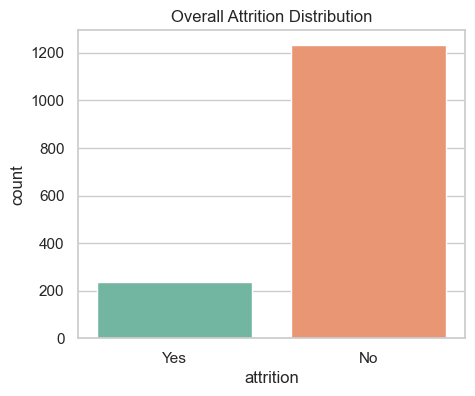

In [7]:
# Set style
sns.reset_defaults()
sns.set(style="whitegrid", palette="Set2")
plt.figure(facecolor='white')

plt.figure(figsize=(5,4))
sns.countplot(x='attrition', hue="attrition", data=df, palette='Set2')
plt.title("Overall Attrition Distribution")
plt.savefig("figures/eda_summary/attrition.png")
plt.show()

#### 2. Department & Job Role Analysis¶

In [9]:
# Department attrition percentages
dept_attrition = pd.crosstab(df['department'], df['attrition'], normalize='index')*100
dept_attrition

attrition,No,Yes
department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


**Interpretation:**
- Sales has highest proportional attrition (~ 20%)
- R&D has largest employee base but lower attrition (~ 14%)
- HR is small but shows ~19% attrition

**Visualisation :**

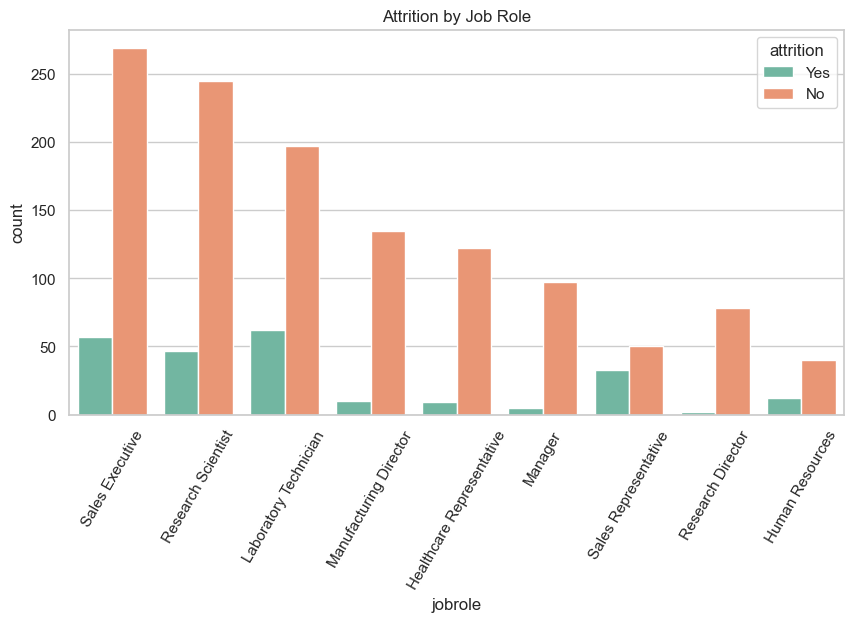

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='jobrole', hue='attrition', data=df, order=df['jobrole'].value_counts().index)
plt.title("Attrition by Job Role")
plt.xticks(rotation=60)
plt.savefig("figures/eda_summary/dept_and_jobroles.png")
plt.show()

#### 3. Overtime Impact

In [13]:
overtime_attrition = pd.crosstab(df['overtime'], df['attrition'], normalize='index')*100
overtime_attrition

attrition,No,Yes
overtime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


**Interpretation:**
- Employees working overtime leave at ~30% vs ~10% for non-overtime.
- Overtime is a key retention factor.

**Visualisation:**

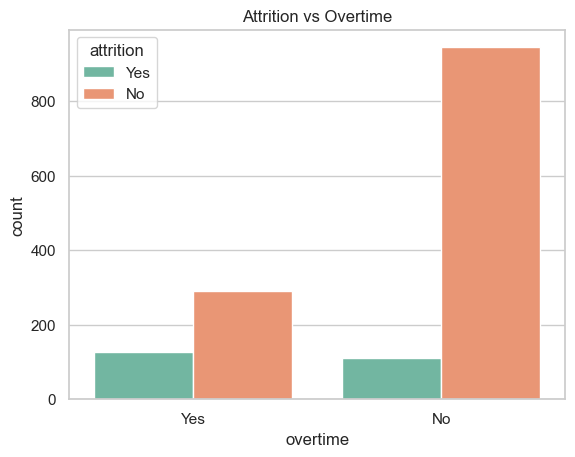

In [15]:
sns.countplot(x='overtime', hue='attrition', data=df)
plt.title("Attrition vs Overtime")
plt.savefig("figures/eda_summary/overtime_impact.png")
plt.show()

#### 4. Age & Tenure Analysis

In [17]:
# Create Age group and tenure buckets
df['age_group'] = pd.cut(df['age'], bins=[0,29,45,100], labels=['<30','30-45','45+'])
df['tenure_bucket'] = pd.cut(df['yearsatcompany'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])

age_attrition = pd.crosstab(df['age_group'], df['attrition'], normalize='index')*100
tenure_attrition = pd.crosstab(df['tenure_bucket'], df['attrition'], normalize='index')*100
print(age_attrition)
print(tenure_attrition)

attrition         No        Yes
age_group                      
<30        72.085890  27.914110
30-45      87.141217  12.858783
45+        87.545788  12.454212
attrition             No        Yes
tenure_bucket                      
0              63.636364  36.363636
1-2            71.140940  28.859060
3-5            86.175115  13.824885
6-10           87.723214  12.276786
10+            91.869919   8.130081


**Interpretation:**
- <30 years: highest attrition (~27–30%)
- 30–45 years: attrition drops (~12–14%)
- 0–2 years tenure: ~29–36% attrition
- Employees with 10+ years: least likely to leave (~8%)

**Visualisation:**

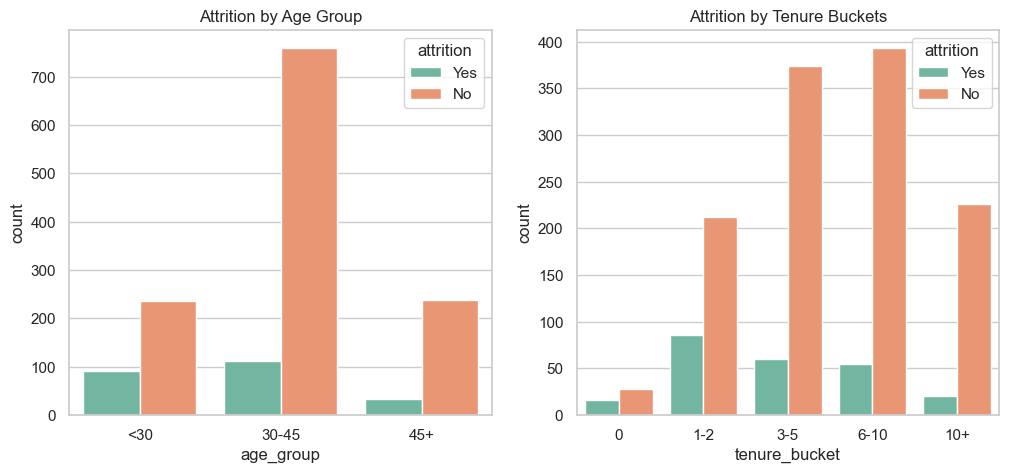

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='age_group', hue='attrition', data=df, ax=axes[0])
axes[0].set_title("Attrition by Age Group")
sns.countplot(x='tenure_bucket', hue='attrition', data=df, ax=axes[1])
axes[1].set_title("Attrition by Tenure Buckets")
plt.savefig("figures/eda_summary/age_tenure_analysis.png")
plt.show()

#### 5. Monthly Income & Compensation

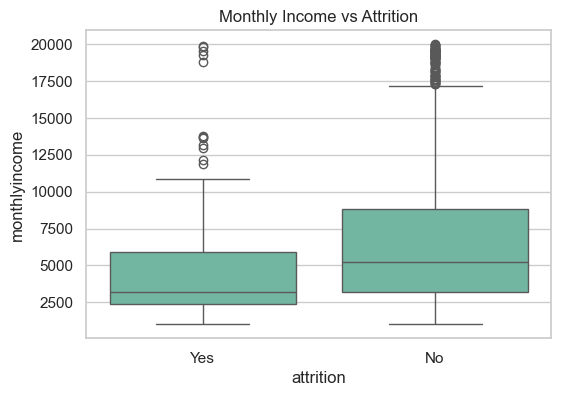

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='attrition', y='monthlyincome', data=df)
plt.title("Monthly Income vs Attrition")
plt.savefig("figures/eda_summary/monthlyincome_vs_attrition.png")
plt.show()

**Interpretation:**
- Employees who left earn lower median monthly income (`~$4.8k`) than those who stayed (`~$6.8k`).
- Compensation is likely a retention factor.

#### 6. Gender & Marital Status

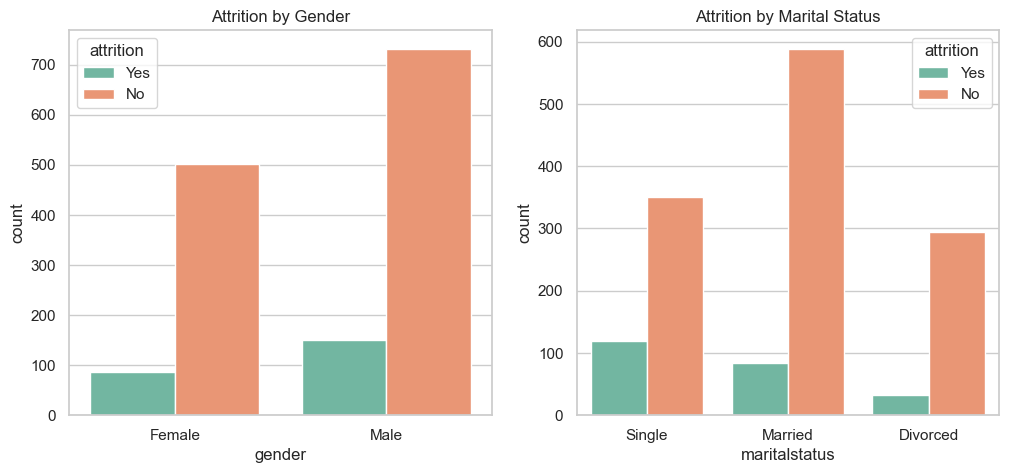

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='gender', hue='attrition', data=df, ax=axes[0])
axes[0].set_title("Attrition by Gender")
sns.countplot(x='maritalstatus', hue='attrition', data=df, ax=axes[1])
axes[1].set_title("Attrition by Marital Status")
plt.savefig("figures/eda_summary/attrition_gender_maritalstatus.png")
plt.show()

**Interpretation:**
- Gender has minor impact on attrition.
- Single employees leave more frequently (`~19%`) than married (`~14%`) or divorced (`~12%`).